In [3]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
#from reportlab.pdfgen import canvas

from datetime import datetime
da = datetime.today().strftime('%Y-%m-%d')


In [16]:
# Acessando os dados pelo do covid19 no Github
dados = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time_changesOnly.csv",header=0, index_col=1,squeeze = True, parse_dates=True)

In [17]:
dados.head()

,epi_week,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,last_info_date
date,,,,,,,,,,,,,,
2020-02-25,9,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.0,0.00811,0.0,SES,2021-05-30
2020-02-25,9,Brazil,TOTAL,TOTAL,0,0,0,1,1,0.0,0.00047,0.0,NaN,NaN
2020-02-28,9,Brazil,SP,São Paulo/SP,3550308,0,0,1,2,0.0,0.01623,0.0,SES,2021-05-30
2020-02-28,9,Brazil,TOTAL,TOTAL,0,0,0,1,2,0.0,0.00094,0.0,NaN,NaN
2020-03-04,10,Brazil,SP,São Paulo/SP,3550308,0,0,1,3,0.0,0.02434,0.0,SES,2021-05-30


In [18]:
dados.drop(['epi_week','ibgeID','totalCases','deaths',
'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',	'deaths_by_totalCases',	'_source',	'last_info_date','country'], axis = 1, inplace = True)

Neste ponto vamos selecionar apenas os principais municipios que visitam Juazeiro do Norte no mes de Setembro

In [20]:
#Municipios mes de setembro
df_Set = dados.loc[dados['city'].isin(['São Paulo/SP','Fortaleza/CE','Recife/PE','Brasília/DF','Maceió/AL','Olinda/PE','Jaboatão dos Guararapes/PE','Natal/RN','Paulista/PE','Aracaju/SE','Caucaia/CE','Camaragibe/PE','São Lourenço da Mata/PE','Vitória de Santo Antão/PE','Igarassu/PE','Abreu e Lima/PE','São José/SC','Paudalho/PE','Goiana/PE','Caruaru/PE','Marechal Deodoro/AL','Rio Largo/AL','Ipojuca/PE','Arapiraca/AL','Murici/AL','Limoeiro/PE','Carpina/PE','Limoeiro do Norte/CE','Satuba/AL','Palmeira dos Índios/AL','Glória do Goitá/PE','Lagoa do Carro/PE','Ilha de Itamaracá/PE','Passira/PE','Ceará-Mirim/RN','Chã de Alegria/PE','Escada/PE','União dos Palmares/AL','Bom Jardim/PE','Itaituba/PA','Ipubi/PE','Pilar/AL','Mari/PB','Pesqueira/PE','Barra de São Miguel/AL','São Miguel dos Campos/AL','Catende/PE','Surubim/PE','Pedro II/PI','Santa Cruz do Capibaribe/PE','Campo Alegre/AL','Coruripe/AL','Lagoa de Itaenga/PE','Altinho/PE','Boca da Mata/AL','Capela/AL','Novo Oriente/CE','Primavera/PA','São Miguel dos Milagres/AL','Agrestina/PE','Atalaia/AL','Branquinha/AL','Caririaçu/CE','Coqueiro Seco/AL','Matriz de Camaragibe/AL','Messias/AL','Orocó/PE','Paulo Jacinto/AL','Viçosa/AL','Cacimba de Dentro/PB','Estrela de Alagoas/AL','Floripe/AL','Macias/AL','Mata Grande/AL','Nossa Senhora das Dores/SE','Passo de Camaragibe/AL','Pindoba/AL','Riacho/PB','São José da Laje/AL','São Luís do Quitunde/AL','Sento-Sé/BA','Tabuleiro/AL','Tapesuma/PE'])]

Neste ponto vamos selecionar apenas os principais municipios que visitam Juazeiro do Norte no mes de Novembro

In [21]:
#mes de novembro
df_Nov = dados.loc[dados["city"].isin(['Fortaleza/CE','Recife/PE','Salvador/BA','Maceió/AL','Olinda/PE','Aracaju/SE','Cabo de Santo Agostinho/PE','Vitória de Santo Antão/PE','Piracicaba/SP','Feira de Santana/BA','Pacatuba/CE','Caruaru/PE','Iguatu/CE','Picos/PI','Arcoverde/PE','Timon/MA','Patos/PB','Petrolina/PE','Salgueiro/PE','Glória do Goitá/PE','Areia Branca/RN','Gravatá/PE','Lagarto/SE','Serra Talhada/PE','Belo Jardim/PE','Juazeiro/BA','Pilar/AL','Porto da folha/SE','Água Branca/PI','Cachoeirinha/PE','Paulo Afonso/BA','Monte Alegre/PA','Frei Miguelinho/PE','Oeiras/PI','São Bento do Una/PE','Ibimirim/PE','Feira nova/PE','Catende/PE','Surubim/PE','Jurema/PE','Águas Belas/PE','Bonito/PA','Lajedo/PE','Panelas/PE','Petrolândia/PE','São José do Egito/PE','Carira/SE','Jatobá/PE','Lagoa dos gatos/PE','Buíque/PE','Aquidabã/SE','Cabrobó/PE','Poço Redondo/SE','Terra Nova/PE','Inajá/PE','Orocó/PE','Araripina/PE','Tuparetama/PE','Carnaubeira/PE','Croatá/CE','Itaporanga/PB','Malhador/SE','Santa Maria/RN','Santana do Ipanema/AL','São Julião/PI','Belém do São Francisco/PE','Pão de açúcar/AL','Conceição/PB','Senhor do Bonfim/BA','Brejo Grande/SE','Coronel Gonçalves/BA','Tacaratu/PE','Bodocó/PE','Bolso Redondo/SE','Caém/BA','Canhotinho/PE','Casa Nova/BA','Corolândia/BA','Fazenda Solidade/PE','Iatí/PE','Itacuruba/PE','Jardim Murimbeca/PE','Natuba/PB','Neópolis/SE','Tupinambás/SE','Santa Cruz da Baixa Verde/PE','Santana do Cariri/CE','São Caetano/PE','Sobradinho/BA'])]

Neste ponto vamos selecionar apenas os principais municipios que visitam Juazeiro do Norte no mes de Janeiro

In [22]:
#mes de janeiro
df_Jan = dados.loc[dados["city"].isin(['São Paulo/SP','Rio de Janeiro/RJ'	,'Fortaleza/CE'	,'Recife/PE'	,'Salvador/BA',	'Maceió/AL'	,'Natal/RN'	,'Porto Velho/RO'	,'Aracaju/SE',	'Imperatriz/MA',	'Campina Grande/PB',	'Paudalho/PE',	'Caruaru/PE',	'Marechal Deodoro/AL'	,'Pombos/PE',	'Rio Largo/AL',	'Caxias/MA',	'Picos/PI',	'Arapiraca/AL',	'Timon/MA',	'Carpina/PE',	'Carpina/PE',	'Palmeira Dos índios/AL',	'Rio Claro/SP',	'Glória do Goitá/PE',	'Salgueiro/PE',	'Garanhuns/PE',	'São Cristóvão/SE',	'Gravatá/PE',	'Chã de Alegria/PE',	'Serra Talhada/PE',	'Cajazeiras/PB',	'Custódia/PE',	'Juazeiro/BA',	'Pilar/AL',	'Acopiara/CE',	'Água Branca/PI',	'Água Branca/AL',	'Cachoeirinha/PE'	,'Paulo Afonso/BA',	'Caetés/PE'	,'Junqueiro/AL',	'Monte Alegre/PA',	'Santo Amaro Das Brotas/SE',	'São Miguel Dos Campos/AL',	'Rio Formoso/PE',	'São Sebastião/AL'	,'Tamandaré/PE'	,'Amontada/CE',	'Bonito/PA',	'Carnaíba/PE',	'Campo Alegre/AL'	,'Taquarana/AL',	'Altino/PE',	'Boca da Mata/AL',	'Bom Conselho/PE',	'Canidé de São Francisco/PE',	'Capoeiras/PE',	'Lagoa dos Gatos/PE',	'Panelas/PE',	'Penedo/AL',	'Porto Calvo/AL',	'Santa Luzia/BA',	'Agrestina/PE',	'Teotônio Vilela/AL',	'Aquidabã/SE',	'Atalaia/AL',	'Bezerros/PE'	,'Delmiro Gouveia/AL',	'Lavras da Mangabeira/CE',	'Monteiro/PB',	'Nossa Senhora De Lourdes/SE',	'Olho Dágua Das Flores/AL',	'Princesa Isabel/PB',	'Santana do Ipanema/AL',	'Teotônio Vilela/AL',	'Touros/RN',	'Viçosa/AL'	,'Água Clara/PE',	'Barra de Guabiraba/PE',	'Bodocó/PE',	'Brejo Grande/SE',	'Canhotinho/PE',	'Carneiros/AL',	'Casa Amarela/PE',	'Ceará Mirim/RN'	,'Coité do Nóia/AL',	'Cumaru/PE',	'Flexeiras/AL',	'Igaci/AL',	'Inhapi/AL'	,'Iupi/PE',	'Jacaré dos Homens/AL',	'Major Isidoro/AL',	'Mata Grande/AL',	'Minador do Negrão/AL',	'Monteirópolis/AL',	'Neópolis/SE'	,'Ouro Branco/MG'	,'Pindoba/AL',	'Piranhas/AL',	'Poço Redondo/SE',	'Quebrangulo/AL',	'Riacho das Almas/PE',	'Santana do Mundaú/AL',	'São Caetano/PE'	,'São José Da Tapera/AL',	'São José Do Tigre/PB',	'São José Do Umbuseiro/PB'
])]

## ANALISE SETEMBRO

In [23]:
#reduzindo df para coluna: Novos Casos
df_set_case = df_Set.drop(['state','city','newDeaths'], axis = 1)

In [36]:
#criando janela para sete dias
rolling = df_set_case.rolling(window=7)
media_movel = rolling.mean()
df_set_case1 = df_set_case.shift(1)

In [38]:
janela = df_set_case1.rolling(window=7)

In [39]:
media_set = janela.mean()

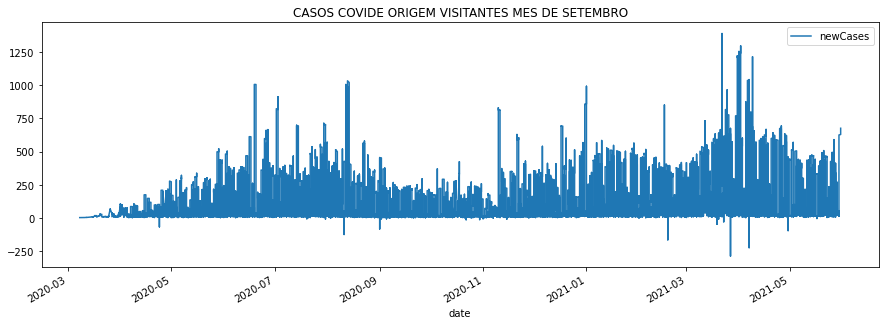

In [40]:
#Grafico para todo o periodo
media_set.plot(figsize = (15,5), 
            title  = "CASOS COVIDE ORIGEM VISITANTES MES DE SETEMBRO",)

fig = plt.gcf()
plt.show()
fig.savefig('SETEMBRO_TOTAL.png', format='png')

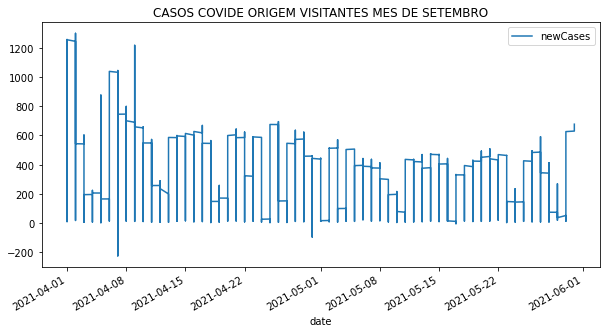

In [47]:
#Grafico ultimos Dois meses
media_set['2021-04-01': da].plot(figsize = (10,5), title = "CASOS COVIDE ORIGEM VISITANTES MES DE SETEMBRO")

fig = plt.gcf()
plt.show()
fig.savefig('SETEMBRO_ULTIMO.png', format='png')

## MES DE NOVEMBRO

In [48]:
df_Nov_case = df_Nov.drop(['state','city','newDeaths'], axis = 1)
rolling = df_Nov_case.rolling(window=7)
media_movel = rolling.mean()
df_Nov_case1 = df_Nov_case.shift(1)
janela = df_Nov_case1.rolling(window=7)
media_nov = janela.mean()

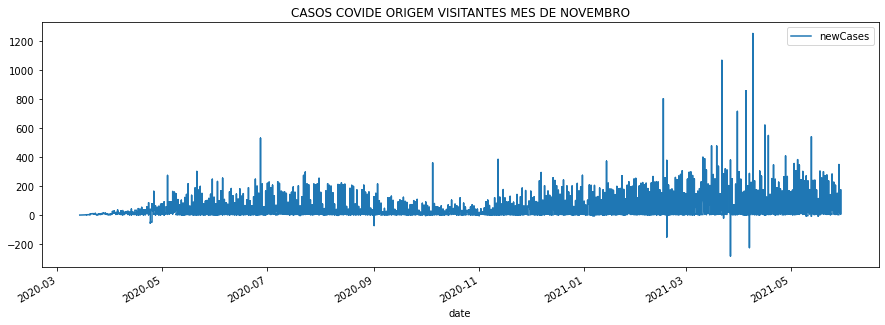

In [49]:
media_nov.plot(figsize = (15,5), 
            title  = "CASOS COVIDE ORIGEM VISITANTES MES DE NOVEMBRO")

fig = plt.gcf()
plt.show()
fig.savefig('NOVEMBRO_TOTAL.png', format='png')

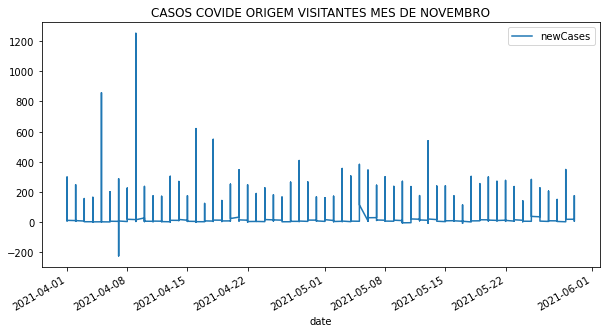

In [50]:
media_nov['2021-04-01' : da].plot(figsize = (10,5), title = "CASOS COVIDE ORIGEM VISITANTES MES DE NOVEMBRO")

fig = plt.gcf()
plt.show()
fig.savefig('NOVEMBRO_ULTIMO.png', format='png')

## MES DE JANEIRO

In [51]:
df_Jan_case = df_Jan.drop(['state','city','newDeaths'], axis = 1)
rolling = df_Jan_case.rolling(window=7)
media_movel = rolling.mean()
df_Jan_case1 = df_Jan_case.shift(1)
janela = df_Jan_case1.rolling(window=7)
media_jan = janela.mean()

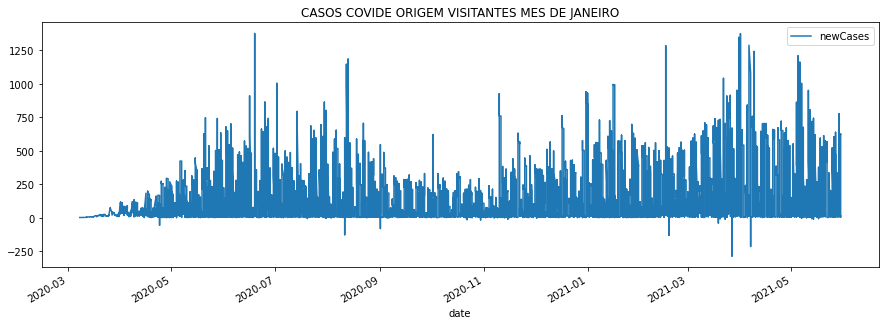

In [52]:
media_jan.plot(figsize = (15,5), 
            title  = "CASOS COVIDE ORIGEM VISITANTES MES DE JANEIRO")

fig = plt.gcf()
plt.show()
fig.savefig('JANEIRO_TOTAL.png', format='png')

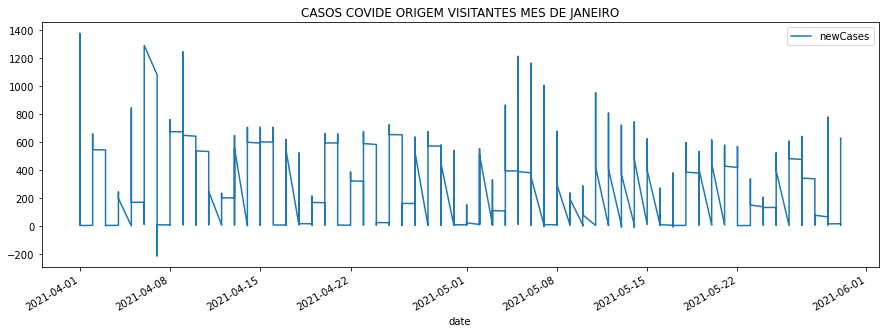

In [53]:
media_jan['2021-04-01' : da].plot(figsize = (15,5), title = "CASOS COVIDE ORIGEM VISITANTES MES DE JANEIRO")

fig = plt.gcf()
plt.show()
fig.savefig('JANEIRO_ULTIMO.png', format='png')

## HISTORICO DA EVOLUÇÃO COVID MUNICIPIOS VISITANTES

<AxesSubplot:title={'center':'CASOS COVIDE ORIGEM VISITANTES MES DE JANEIRO'}, xlabel='date'>

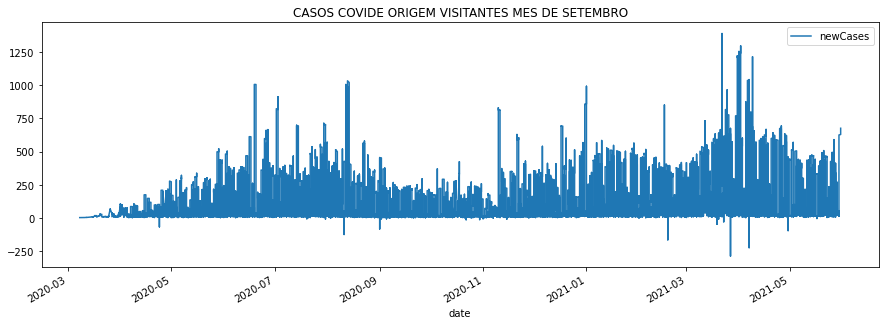

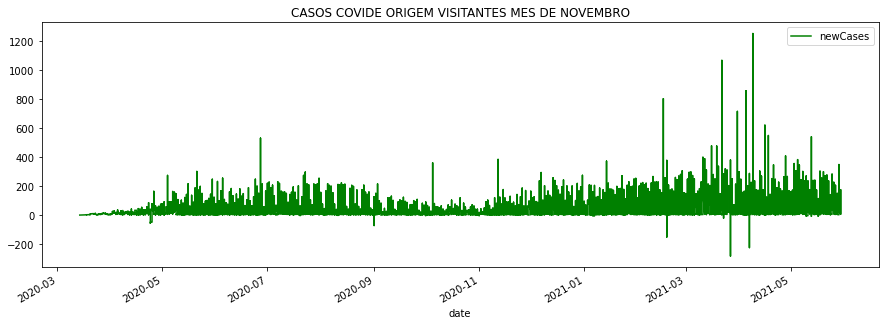

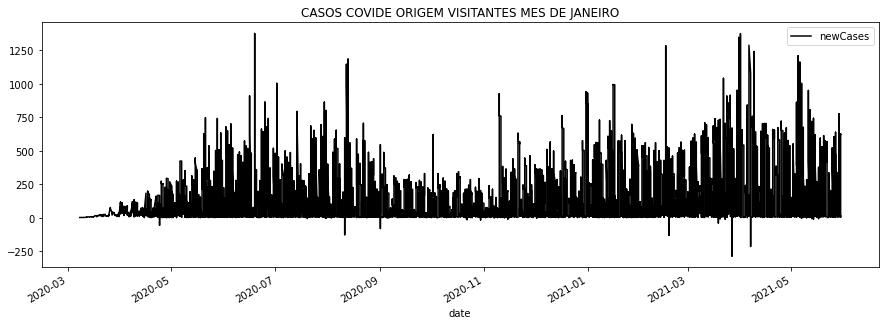

In [54]:
media_set.plot(figsize = (15,5), 
            title  = "CASOS COVIDE ORIGEM VISITANTES MES DE SETEMBRO")

media_nov.plot(figsize = (15,5), 
            title  = "CASOS COVIDE ORIGEM VISITANTES MES DE NOVEMBRO", color = "green")

media_jan.plot(figsize = (15,5), 
            title  = "CASOS COVIDE ORIGEM VISITANTES MES DE JANEIRO", color = 'black')

## RESUMO DOS MUNICIPISO VISITANTES DOIS ULTIMOS MESES

<AxesSubplot:title={'center':'CASOS COVIDE ORIGEM VISITANTES MES DE JANEIRO'}, xlabel='date'>

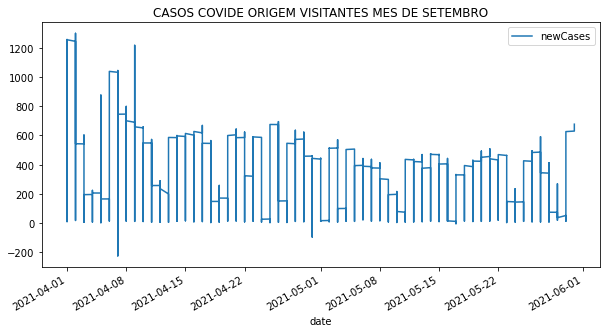

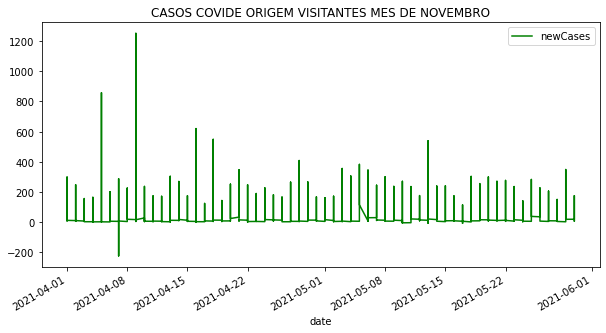

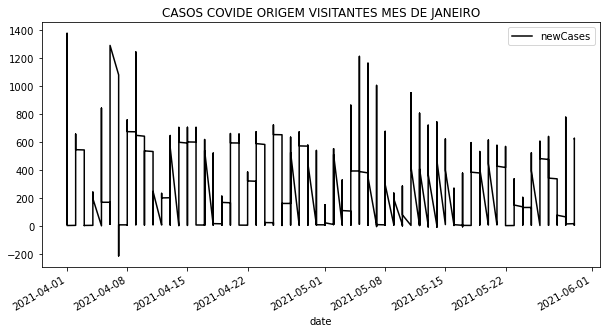

In [66]:
media_set['2021-04-01' : da].plot(figsize = (10,5), title = "CASOS COVIDE ORIGEM VISITANTES MES DE SETEMBRO", )

media_nov['2021-04-01' : da].plot(figsize = (10,5), title = "CASOS COVIDE ORIGEM VISITANTES MES DE NOVEMBRO", color = "green")

media_jan['2021-04-01' : da].plot(figsize = (10,5), title = "CASOS COVIDE ORIGEM VISITANTES MES DE JANEIRO", color = 'black')

